[*********************100%***********************]  1 of 1 completed


Analyzing TCS.NS...



/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  buyhold_profit = float(end_price - start_price)
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  elif float((data['Position'].iloc[i])==-2) and float(shares)>0:
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_value = float(cash + shares * final_stock_price)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will

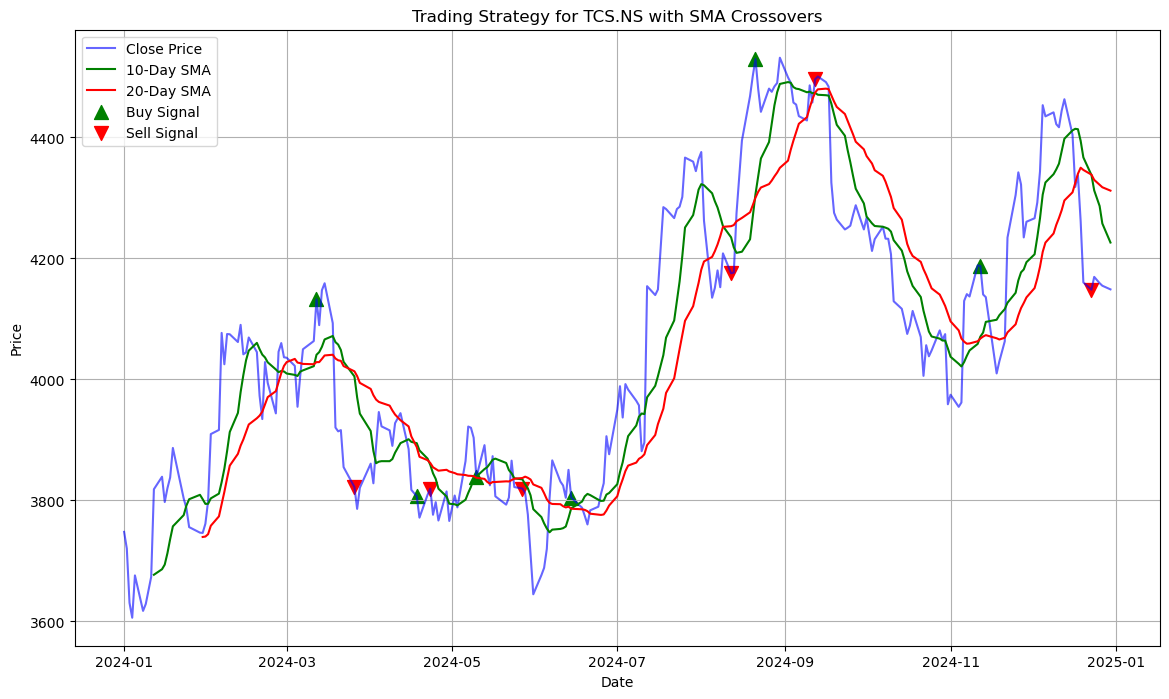

Ticker: TCS.NS
Final Portfolio Value: 99627.79
Net Profit/Loss: -372.21
Buy and Hold Profit: 400.88


Analyzing INFY.NS...


[*********************100%***********************]  1 of 1 completed
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  buyhold_profit = float(end_price - start_price)
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  elif float((data['Position'].iloc[i])==-2) and float(shares)>0:
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_value = float(cash + shares * final_stock_price)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarn

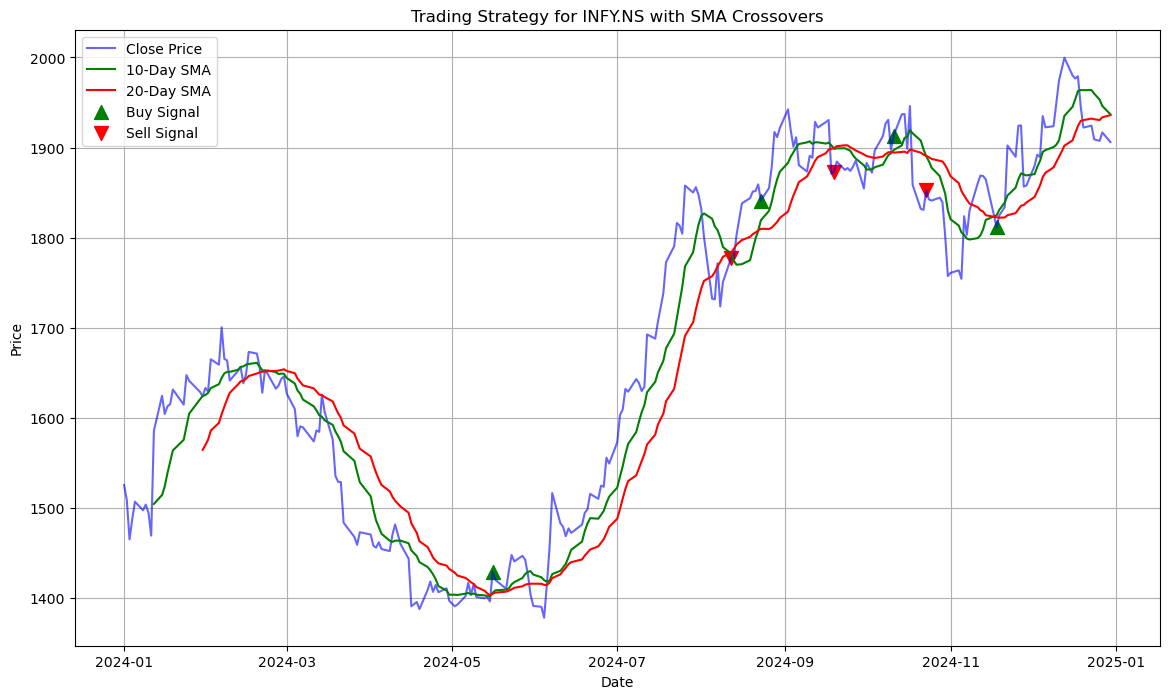

[*********************100%***********************]  1 of 1 completed

Ticker: INFY.NS
Final Portfolio Value: 128523.87
Net Profit/Loss: 28523.87
Buy and Hold Profit: 380.71


Analyzing RELIANCE.NS...



/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  buyhold_profit = float(end_price - start_price)
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  elif float((data['Position'].iloc[i])==-2) and float(shares)>0:
/var/folders/4v/yx3_y_2x669dx6nx4fcnws400000gn/T/ipykernel_32435/2871836054.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_value = float(cash + shares * final_stock_price)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will

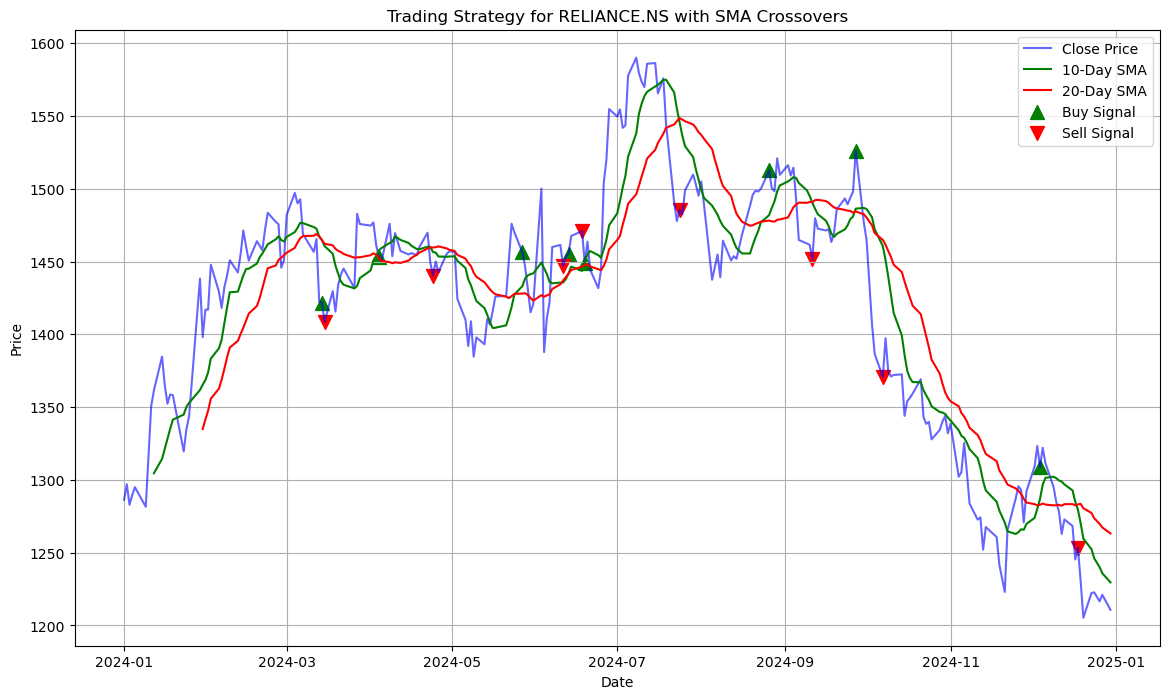

Ticker: RELIANCE.NS
Final Portfolio Value: 83630.44
Net Profit/Loss: -16369.56
Buy and Hold Profit: -75.66


Overall Results:
Average Net Profit/Loss: 3927.37
Average Buy and Hold Profit: 235.31
On average, your strategy outperforms the buy-hold approach!


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def sma_trading_strategy(ticker, start_date="2024-01-01", end_date="2024-12-31", initial_cash=100000):
    # Fetch historical stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print(f"No data available for {ticker}.")
        return None

    # Calculate SMAs
    data['10_SMA'] = data['Close'].rolling(window=10).mean()
    data['20_SMA'] = data['Close'].rolling(window=20).mean()

    # Extract closing prices for buy-and-hold strategy
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    buyhold_profit = float(end_price - start_price)

    # Generate trading signals
    data.loc[data['10_SMA'] > data['20_SMA'], 'Signal'] = 1  # Buy signal
    data.loc[data['10_SMA'] < data['20_SMA'], 'Signal'] = -1  # Sell signal
    data['Position'] = data['Signal'].diff()

    # Backtesting strategy
    cash = initial_cash
    shares = 0
    trade_log = []

    for i in range(len(data)):
        price = data['Close'].iloc[i]  # Get the price at the current index

        # Check Position for Buy (1 or 2)
        if float(data['Position'].iloc[i])==2 :
            shares = cash // price  # Determine how many shares to buy
            cash -= shares * price  # Deduct cash for the purchase
            trade_log.append((data.index[i], "BUY", price, shares))
    
    # Check Position for Sell (-1 or -2) and ensure there are shares to sell
        elif float((data['Position'].iloc[i])==-2) and float(shares)>0:
            cash += shares * price  # Add cash from selling shares
            trade_log.append((data.index[i], "SELL", price, shares))  # Log the sale
            shares = 0  # Reset shares to 0 after selling

    # Final portfolio value
    final_stock_price = data['Close'].iloc[-1]
    final_value = float(cash + shares * final_stock_price)
    profit_loss = float(final_value - initial_cash)

    # Convert trade log to a DataFrame
    trade_df = pd.DataFrame(trade_log, columns=['Date', 'Action', 'Price', 'Shares'])

    # Plotting the SMA and buy/sell points
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label="Close Price", color="blue", alpha=0.6)
    plt.plot(data['10_SMA'], label="10-Day SMA", color="green")
    plt.plot(data['20_SMA'], label="20-Day SMA", color="red")
    plt.scatter(trade_df[trade_df['Action'] == "BUY"]['Date'],
                trade_df[trade_df['Action'] == "BUY"]['Price'],
                label="Buy Signal", marker="^", color="green", s=100)
    plt.scatter(trade_df[trade_df['Action'] == "SELL"]['Date'],
                trade_df[trade_df['Action'] == "SELL"]['Price'],
                label="Sell Signal", marker="v", color="red", s=100)
    plt.title(f"Trading Strategy for {ticker} with SMA Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

    # Display results
    print(f"Ticker: {ticker}")
    print(f"Final Portfolio Value: {final_value:.2f}")
    print(f"Net Profit/Loss: {profit_loss:.2f}")
    print(f"Buy and Hold Profit: {buyhold_profit:.2f}\n")

    result = {
        "Ticker": ticker,
        "Final Value": final_value,
        "Net Profit/Loss": profit_loss,
        "Buy and Hold Profit": buyhold_profit,
        "Outperformed Buy-Hold": profit_loss > buyhold_profit
    }
    return result

# Function to test multiple companies and calculate overall average

def analyze_multiple_companies(tickers, start_date="2024-01-01", end_date="2024-12-31", initial_cash=100000):
    results = []

    for ticker in tickers:
        print(f"\nAnalyzing {ticker}...")
        result = sma_trading_strategy(ticker, start_date, end_date, initial_cash)
        if result:
            results.append(result)

    # Calculate overall averages
    if results:
        avg_profit_loss = sum([res["Net Profit/Loss"] for res in results]) / len(results)
        avg_buyhold_profit = sum([res["Buy and Hold Profit"] for res in results]) / len(results)

        print("\nOverall Results:")
        print(f"Average Net Profit/Loss: {avg_profit_loss:.2f}")
        print(f"Average Buy and Hold Profit: {avg_buyhold_profit:.2f}")

        if avg_profit_loss >= avg_buyhold_profit:
            print("On average, your strategy outperforms the buy-hold approach!")
        else:
            print("On average, buy-hold is more profitable than your strategy.")

    else:
        print("No valid data for any of the tickers.")

# Example usage
companies = ["TCS.NS", "INFY.NS", "RELIANCE.NS"]
analyze_multiple_companies(companies)
